<img src = "https://www.bits-pilani.ac.in/Uploads/Campus/BITS_university_logo.gif">

<h1><center>Work Integrated Learning Programmes Division<br>
M.Tech (Data Science and Engineering)<br> Data Visualization And Interpretation (DSECL ZG555))<br>
First Semester, 2021-22
</center></h1>

<h2><center>Assignment 2 – PS8 [Weightage 13%]</center></h2>

<ol>
  <li>Do not change the name of the data file that is shared with the problem statement.</li>
  <li>If intermediate data files are created, retain in the present working directory and attach them during submission.</li>
  <li>Retain the data file in the same directory as that of this workbook.</li>
  <li>Retain the Visualizations that is produced in the file. Don't clear them away.</li>
  <li>Submit only the .IPYNB file. Intermediate files to be attached as mentioned in (2).</li>
     <li><b><div class="alert-warning">All the visuals should adhere to the visualization principles learnt in the Course and must be presentation ready.Most effective visuals would fetch maximum credits</div></b></li>    
    <li><b><div class="alert-warning">Submissions done via means other than CANVAS will strictly be NOT graded.</div></b></li>
</ol>

<style>
table {
  font-family: arial, sans-serif;
  border-collapse: collapse;
  width: 100%;
}

td, th {
  border: 1px solid #dddddd;
  text-align: left;
  padding: 8px;
}

tr:nth-child(even) {
  background-color: #dddddd;
}
</style>

<h2>Group No: 068</h2>

<table>
  <tr>
    <th>Full Name</th>
    <th>BITS ID</th>
  </tr>
  <tr>
    <td>Ankur kumar</td>
    <td>2020SC04494</td>
  </tr>
  <tr>
    <td>Abhishek Pandey</td>
    <td>2020SC04655</td>
  </tr>
  <tr>
    <td>Saksham Agarwal</td>
    <td>2020sc04418</td>
  </tr>
</table>

<h3>Objective</h3>
<h4>Identify the features which have high impact on attrition</h4>

##  Download and Prep the Data: 1 Mark

Import the modules needed

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_rows = 100
pd.options.display.max_columns = 500

Download the dataset and read it into a dataframe

In [2]:
#read datset
dataset = pd.read_csv('dvi-a2-ps8-data.csv')

First five items in the dataset.

In [3]:
dataset.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,Gender,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StandardHours,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,1,Female,Sales Executive,Very High,Single,5993,8,Yes,11,Excellent,80,8,6,4,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,2,Male,Research Scientist,Medium,Married,5130,1,No,23,Outstanding,80,10,10,7,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,4,Male,Laboratory Technician,High,Single,2090,6,Yes,15,Excellent,80,7,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,5,Female,Research Scientist,High,Married,2909,1,Yes,11,Excellent,80,8,8,7,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,7,Male,Laboratory Technician,Medium,Married,3468,9,No,12,Excellent,80,6,2,2,2


Find out how many entries there are in the dataset.

In [4]:
dataset.shape

(1470, 23)

### There are 1470 rows and 23 columns in dataset

Clean up data. <br>
Remove unnecessary columns. Mention the reasons.<br>
Show the data.

In [5]:
# Check missing data
dataset.isnull().sum()

Age                     0
Attrition               0
BusinessTravel          0
DailyRate               0
Department              0
DistanceFromHome        0
Education               0
EducationField          0
EmployeeNumber          0
Gender                  0
JobRole                 0
JobSatisfaction         0
MaritalStatus           0
MonthlyIncome           0
NumCompaniesWorked      0
OverTime                0
PercentSalaryHike       0
PerformanceRating       0
StandardHours           0
TotalWorkingYears       0
YearsAtCompany          0
YearsInCurrentRole      0
YearsWithCurrManager    0
dtype: int64

## There are no missing values in the dataset

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   1470 non-null   int64 
 1   Attrition             1470 non-null   object
 2   BusinessTravel        1470 non-null   object
 3   DailyRate             1470 non-null   int64 
 4   Department            1470 non-null   object
 5   DistanceFromHome      1470 non-null   int64 
 6   Education             1470 non-null   object
 7   EducationField        1470 non-null   object
 8   EmployeeNumber        1470 non-null   int64 
 9   Gender                1470 non-null   object
 10  JobRole               1470 non-null   object
 11  JobSatisfaction       1470 non-null   object
 12  MaritalStatus         1470 non-null   object
 13  MonthlyIncome         1470 non-null   int64 
 14  NumCompaniesWorked    1470 non-null   int64 
 15  OverTime              1470 non-null   

In [7]:
# As employee number is just a key, it is not a attribute so it need to be removed
dataset = dataset.drop(['EmployeeNumber'], axis = 1)

### As employee number is just a key which is created as autoincrement, So it doesn't have impact on attrition so removed that

In [8]:
# Check duplicate rows
dataset.duplicated().value_counts()

False    1470
dtype: int64

### No duplicate rows found

In [9]:
dataset.nunique()

Age                       43
Attrition                  2
BusinessTravel             3
DailyRate                886
Department                 3
DistanceFromHome          29
Education                  5
EducationField             6
Gender                     2
JobRole                    9
JobSatisfaction            4
MaritalStatus              3
MonthlyIncome           1349
NumCompaniesWorked        10
OverTime                   2
PercentSalaryHike         15
PerformanceRating          2
StandardHours              1
TotalWorkingYears         40
YearsAtCompany            37
YearsInCurrentRole        19
YearsWithCurrManager      18
dtype: int64

## Dataset after cleanup

In [10]:
dataset.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,Gender,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StandardHours,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,Female,Sales Executive,Very High,Single,5993,8,Yes,11,Excellent,80,8,6,4,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,Male,Research Scientist,Medium,Married,5130,1,No,23,Outstanding,80,10,10,7,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,Male,Laboratory Technician,High,Single,2090,6,Yes,15,Excellent,80,7,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,Female,Research Scientist,High,Married,2909,1,Yes,11,Excellent,80,8,8,7,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,Male,Laboratory Technician,Medium,Married,3468,9,No,12,Excellent,80,6,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,College,Life Sciences,Male,Laboratory Technician,Very High,Single,3068,0,No,13,Excellent,80,8,7,7,6
6,59,No,Travel_Rarely,1324,Research & Development,3,Bachelor,Medical,Female,Laboratory Technician,Low,Married,2670,4,Yes,20,Outstanding,80,12,1,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,Below College,Life Sciences,Male,Laboratory Technician,High,Divorced,2693,1,No,22,Outstanding,80,1,1,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,Bachelor,Life Sciences,Male,Manufacturing Director,High,Single,9526,0,No,21,Outstanding,80,10,9,7,8
9,36,No,Travel_Rarely,1299,Research & Development,27,Bachelor,Medical,Male,Healthcare Representative,High,Married,5237,6,No,13,Excellent,80,17,7,7,7


# Visualisation Questions - 2 X 5 = 10 Marks

### Question 1
<h4>Find the correlation between all numerical features.<br><br>
    Write the python code in the below cell to create appropriate visual to perform the above task.
    <h4>Answer in markdown cells below the visual <br><br>
        1.Summarise your findings from the visual.<br>
            2.The reason for selecting the chart type you did <br>
                3.Mention the pre-attentive attributes used.(atleast 2)<br>
                    4.Mention the gestalt principles used.(atleast 2)<br>
   

<AxesSubplot:>

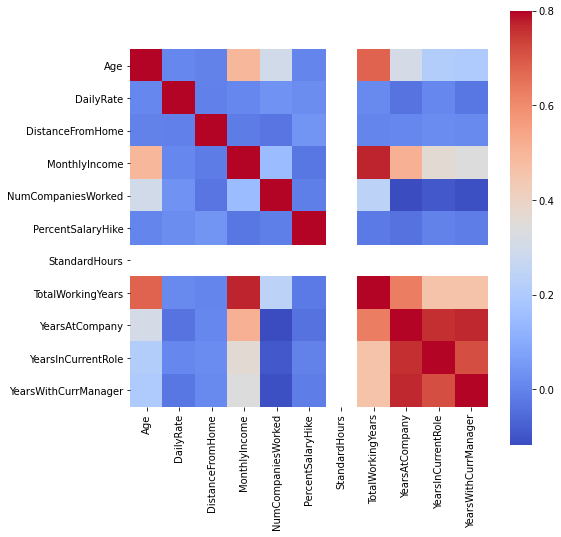

In [11]:
## Create heatmap for correlation between numerical features
numerical_features = dataset.columns[dataset.dtypes != 'object']
matrix = dataset[numerical_features].corr()
plt.figure(figsize=(8, 8))
sns.heatmap(matrix,vmax=0.8,square=True,cmap="coolwarm")

### The correlated features are :
#### 1. Age is correlated with MonthyIncome and TotalWorkingYears
#### 2. MonthyIncome is correlated with Age, YearsAtCompany and highly correlated with TotalWorkingYears
#### 3. TotalWorkingYears is correlated with age, YearsAtCompany
#### 4. YearsAtCompany is highly correlated with TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
#### 5. YearsInCurrentRole is highly correlared with YearsAtCompany and YearsWithCurrManager
#### 6. YearsWithCurrManager is highly correlated with YearsInCurrentRole, YearsAtCompany

### Reason for chossing the visual
#### Here the requirement was to show the correlation between the multiple numerical featues which becomes the n*n dataset if the number of features are n. Also in addition we need to show the magnitude of the correlation in the chart so that the correlated featues can be identified quicky.
#### To fullfil the above 2 requirements we only have heatmap and highlight table, But visually heatmap is a more effective visual than highlight table as heatmap doesn't require to read the values by the users as done is case of highlight table.

### Preattentive attributes used
#### 1. Color - Different color signify different magnitudes or correlation
#### 2. Intensity - For some ranges color remains same but intensity differs.

### Gestalt principles used
### 1. Proximity - Attribute names are written closely to cells along rows and columns to ease mapping of compared attributes with the cell.
### 2. Closure - Heatmap gives visualization of a table without any borders.

## --------------------------------------------------------------------------------------------------------

### Question 2
<h4>Find the distribution of age in the dataset. Identify which age group is most prone to attrition.<br>

Write the python code in the below cell to create the appropriate visual to perform the above task .
<h4>Answer in markdown cells below the visual <br><br>
    1.Summarise your findings from the visual.<br>
    2.The reason for selecting the chart type you did <br>
    3.Mention the pre-attentive attributes used.(atleast 2)<br>
    4.Mention the gestalt principles used.(atleast 2)<br>  


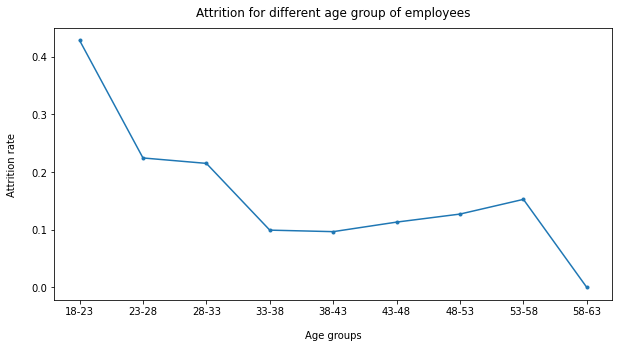

In [12]:
## Perform binning on age
dataset_bin = dataset.copy()
ibin=[18,23,28,33,38,43,48,53,58,63]
group=['18-23','23-28','28-33','33-38','38-43','43-48','48-53','53-58','58-63']
dataset_bin['ibin']=pd.cut(dataset_bin['Age'],ibin,labels=group)
ct1=pd.crosstab(dataset_bin['ibin'],dataset_bin['Attrition'])
## Create line chart to show attrition
ct1.div(ct1.sum(1).astype(float),axis=0).drop(columns=['No']).plot(figsize=(10,5),style=".-", legend=False)
plt.xlabel("Age groups", labelpad=14)
plt.ylabel("Attrition rate", labelpad=14)
plt.title("Attrition for different age group of employees", y=1.02);

### Observations are:
#### 1. 18-23 age group is highest prone the the attrition
#### 2. 23-28 and 28-33 age groups are moderately prone to the iteration

### Reason for choosing the visual
#### Line chart easily shows the trend in attribution rate for age groups with increasing age showing which age group is most prone to attrition at the same time.

### Preattentive attributes used
#### 1. Added marks - Placing marker at attrition rate of each age group.
#### 2. Motion - Showing change in attrition rate with increasing age.


### Gestalt principles used
### 1. Continuity - Continuous change in attrition rates over age groups.
### 2. Proximity - Axis title is close to axis values

## --------------------------------------------------------------------------------------------------------

### Question 3
<h4>Analyse the departmentwise attrition rate.<br>

Write the python code in the below cell to create the appropriate visual to perform the above task .
<h4>Answer in markdown cells below the visual <br><br>
    1.Summarise your findings from the visual.<br>
    2.The reason for selecting the chart type you did <br>
    3.Mention the pre-attentive attributes used.(atleast 2)<br>
    4.Mention the gestalt principles used.(atleast 2)<br>  


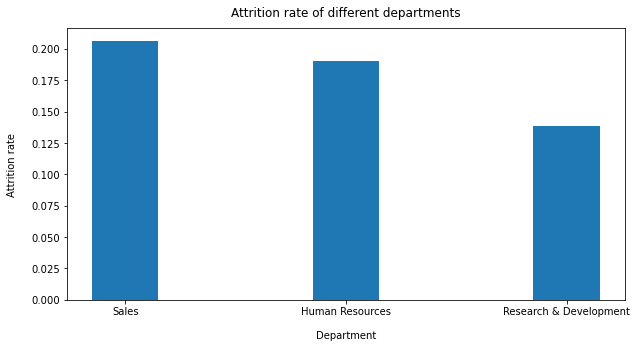

In [13]:
## Find department wise attrition rate
department_wise = pd.crosstab(dataset['Department'],dataset['Attrition'],normalize='index')
department_wise = department_wise.sort_values('Yes', ascending=False)
department_wise_attr_rate = department_wise.reset_index()

## Create Desceding attrition rate bar chart
fig = plt.figure(figsize =(10, 5))
plt.bar(department_wise_attr_rate['Department'],department_wise_attr_rate['Yes'],width=0.3)
plt.xlabel("Department", labelpad=14)
plt.ylabel("Attrition rate", labelpad=14)
plt.title("Attrition rate of different departments", y=1.02);
plt.show()

### Observations are:
#### 1. Sales department is most prone to the attrition which is having close to 20% attrition
#### 2. Human resource department is second most prone to the attrition which is having close to 18% of attrition
#### 3. Research & Development is least prone to iteration having 15% attrition

### Reason for choosing the visual
#### Since number of deparments is low we can easily use bar chart to display attrition rate for them.

### Preattentive attributes used
####  Length - Longer bar means higher attrition


### Gestalt principles used
### 1. Proximity
### 2. Similarity - Same color for all bars
### 3. Continuity - Bars are displayed in decreasing value of attrition rate

## -----------------------------------------------------------------------------------------------

### Question 4
<h4>Identify the top 5 job roles with highest attrition rate.<br>

Write the python code in the below cell to create the appropriate visual to perform the above task .
<h4>Answer in markdown cells below the visual <br><br>
    1.Summarise your findings from the visual.<br>
    2.The reason for selecting the chart type you did <br>
    3.Mention the pre-attentive attributes used.(atleast 2)<br>
    4.Mention the gestalt principles used.(atleast 2)<br>  


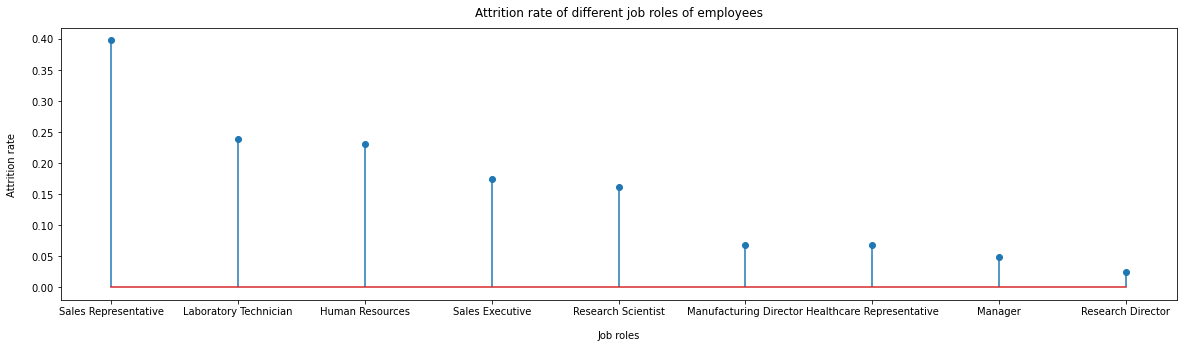

In [14]:
## Find job role wise attrition rate
jobrole = pd.crosstab(dataset['JobRole'],dataset['Attrition'],normalize='index')
jobrole = jobrole.sort_values('Yes', ascending=False)
jobrole_attr_rate = jobrole.reset_index()

## Create JobRole by desceding attrition rate bar chart
fig = plt.figure(figsize =(20, 5))
# plt.bar(jobrole_attr_rate['JobRole'],jobrole_attr_rate['Yes'],width=0.3)
plt.stem(jobrole_attr_rate['Yes'])
my_range=range(0,len(jobrole_attr_rate.index))
plt.xticks(my_range, jobrole_attr_rate['JobRole'])
plt.xlabel("Job roles", labelpad=14)
plt.ylabel("Attrition rate", labelpad=14)
plt.title("Attrition rate of different job roles of employees", y=1.02);
plt.show()

### Observations are:
#### Top 5 JobRoles which are most prone to attrition are 'Sales Representative' , 'Laboratery Technician', 'Human Resource','Sales Executive' and 'Research scientist'

### Reason for choosing the visual
#### Stem chart/Lolipop chart easily shows attrition rate for different job roles which making it easily to compare atttrition rate of one job role with others at the same time.

### Preattentive attributes used
#### 1. Length
#### 2. Added marks

### Gestalt priciples used
### 1. Proximity
### 2. Continuity
### 3. Similarity

## --------------------------------------------------------------------------------------------------------

### Question 5
<h3> Multivariate analysis
<h4>Identify the top 2 highly correlated features.Analyse(use a single visual), how they relate to "number of years in the company" and their combined effect on attrition.<br>
    
Write the python code in the below cell to create the appropriate visual to perform the above task .
<h4>Answer in markdown cells below the visual <br><br>
    1.Summarise your findings from the visual.<br>
    2.The reason for selecting the chart type you did <br>
    3.Mention the pre-attentive attributes used.(atleast 2)<br>
    4.Mention the gestalt principles used.(atleast 2)<br>  

<AxesSubplot:>

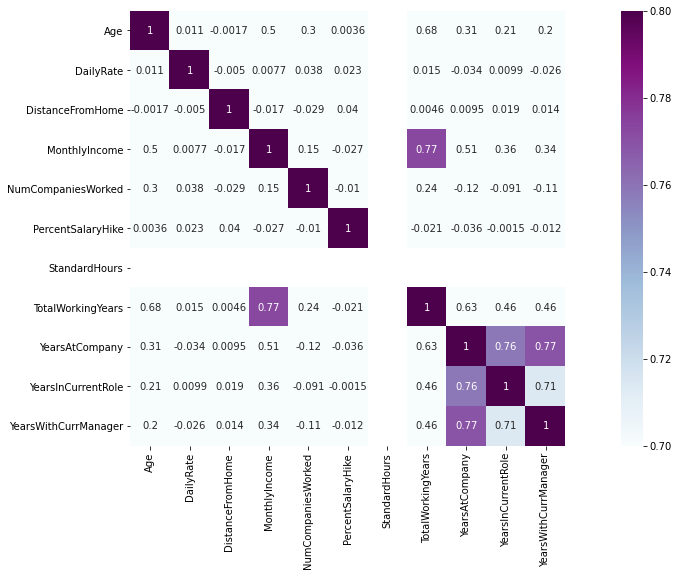

In [15]:
matrix = dataset.corr()
plt.figure(figsize=(20, 8))
sns.heatmap(matrix,vmax=0.8,square=True,vmin=0.7,annot=True,cmap="BuPu")

### Observations are:
#### Two highly correlated features are   (TotalWorkingYears and MonthlyIncome) and (YearsAtCompany and YearsWithCurrManger)

### Reason for choosing the visual
#### Heatmap with values and controlled color option is most effective to show the most correlated features no other visual provides the  option to use color intensity to visualize the values.

### Preattentive attributes used
#### 1. Color
#### 2. Intensity
#### 3. Added marks

### Gestalt priciples used
### 1. Proximity
### 2. Continuity
### 3. Connection

In [16]:
X = dataset[['MonthlyIncome','YearsAtCompany','YearsWithCurrManager','TotalWorkingYears']]
Y = dataset['Attrition']

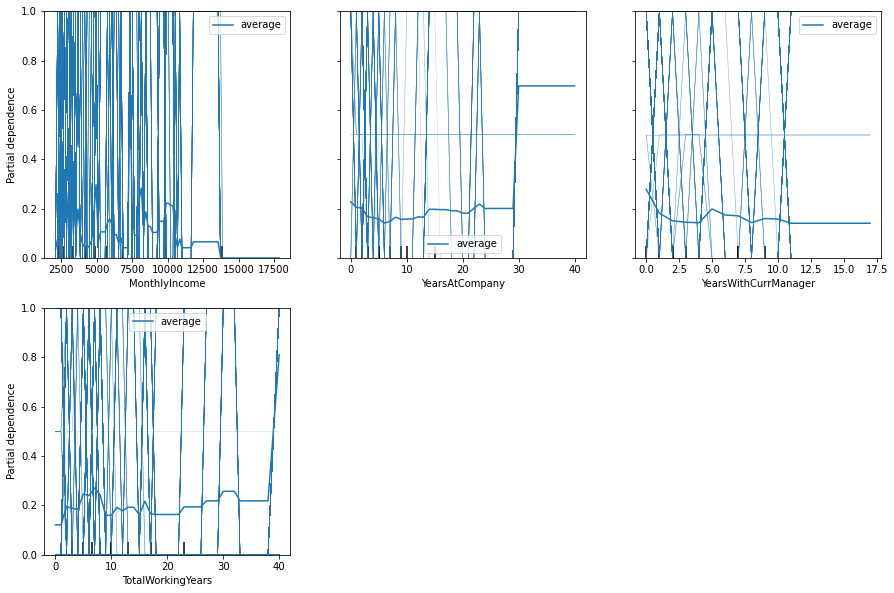

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.inspection import PartialDependenceDisplay

classifier=DecisionTreeClassifier()
classifier.fit(X,Y)
fig, ax = plt.subplots(figsize=(15, 10))
PartialDependenceDisplay.from_estimator(classifier, X, features=[0,1,2,3],feature_names=['MonthlyIncome','YearsAtCompany','YearsWithCurrManager','TotalWorkingYears'],kind='both',ax=ax)
plt.show()

### As "monthly income" increases first attrition increases then decreases
### As "total working years" increases first attrition increases then decreases
### As "years at company" increases first attrition decreases then increases
### As "years with current manager" increases attrition decreases

## -------------------------------------------------------------------------------------

# Group's choice-2 Marks
 
#### Frame 1 (more) question which will help in the EDA(Exploratory Data Analysis) of the given data set and answer the same using the best visual.
 
 1. Write the question in a markdown cell
 2. Below the question,in a coding cell,write the python code to create the visual to answer the question  

<h4> Answer in markdown cells below the visual <br><br>
   1.Summarise your findings from the visual.<br>
   2.The reason for selecting the chart type you did <br>
   3.Mention the pre-attentive attributes used.(atleast 2)<br>
   4.Mention the gestalt principles used.(atleast 2)<br>
  

## Analyze how Monthly Income varies with an employee's age.

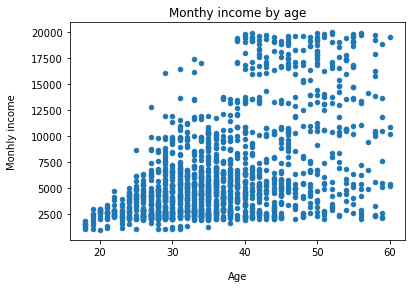

In [18]:
dataset.plot.scatter(x='Age', y='MonthlyIncome', title= "Monthy income by age");
plt.xlabel("Age", labelpad=14)
plt.ylabel("Monhly income", labelpad=14)
plt.show();

### Observations are:
#### We can say that monthly income has positive correlation with age. Monthly income increases as the age increases. Also, the number of people in upper salary ranges increases as their age increases.

### Reason for choosing the visual
#### Scatter plot helps to see what kind of relation does two values have. Are they positively correlated, negatively correlated or not related at all.

### Preattentive attributes used
#### 1. Spatial position - Position of a marker tells both age and monthly income of an individual.
#### 2. Density - Higher density in certain vertical region indicates more number of individuals have salaries centered around some value for a particular age

### Gestalt priciples used
### 1. Proximity
### 2. Continuity - Markers in an increasing order

<h1><center> ************ END OF ASSIGNMENT ****************</center></h1>